In [1]:
import numpy as np
import pandas as pd

In [8]:
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [9]:
ds =  pd.read_csv(r'C:\Users\sarka\Desktop\Major Project\input\nyse\prices-split-adjusted.csv' , header=0)
#Adjusted prices used for absolute consumer value
ds.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


No handles with labels found to put in legend.


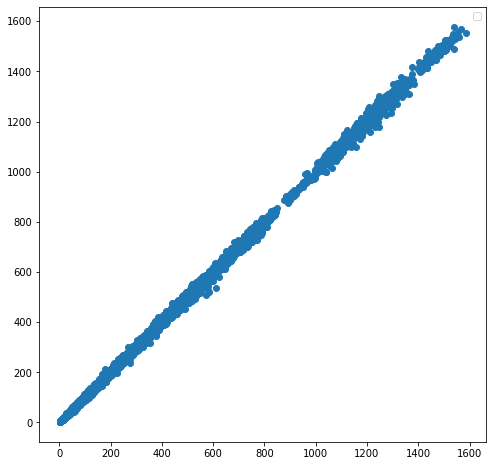

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(ds['open'],ds['close'])
plt.show()
ms = ds[ds['symbol']=='MSFT']
ms_stock_prices = ms.close.values.astype('float32')
#distribution is clearly linear

In [11]:
ms_stock_prices

array([30.95, 30.96, 30.77, ..., 62.99, 62.9 , 62.14], dtype=float32)

In [12]:
ms_stock_prices.reshape(1762, 1)

array([[30.95],
       [30.96],
       [30.77],
       ...,
       [62.99],
       [62.9 ],
       [62.14]], dtype=float32)

In [13]:
ms_stock_prices.shape

(1762,)

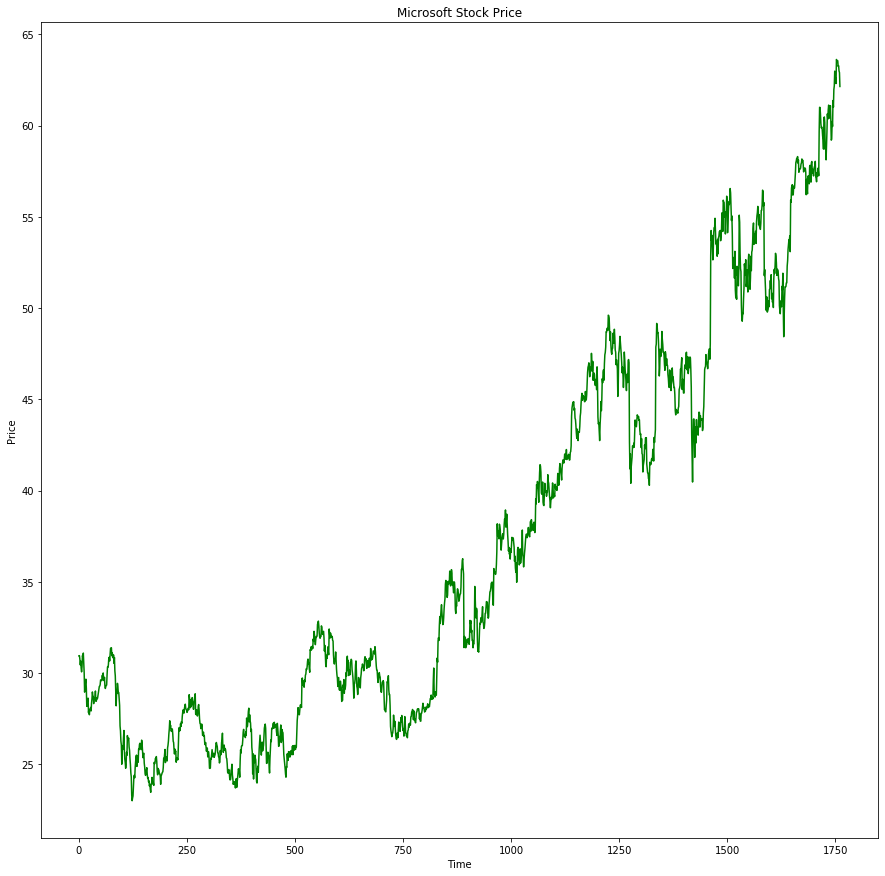

In [102]:
plt.figure(figsize=(15,15))
plt.title('Microsoft Stock Price')
plt.plot(ms_stock_prices, color ='green')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

In [94]:
sc = MinMaxScaler(feature_range=(0,1))
ms_dataset = sc.fit_transform(ms_stock_prices.reshape(-1,1))

In [16]:
ms_dataset.shape

(1762, 1)

In [17]:
train_size = int(0.80 * len(ms_dataset))
test_size = len(ms_dataset)-train_size

In [18]:
train , test = ms_dataset[0:train_size,:], ms_dataset[train_size:len(ms_dataset),:]
print(len(train))
print(len(test))

1409
353


In [19]:
#lookback is Number of steps to check for output
def create_dataset(dataset, look_back=30):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
#looks at n values to determine next
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:
trainX.shape

(1406, 2)

In [22]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

In [23]:
trainX.shape
trainX

array([[[0.19551837],
        [0.19576454]],

       [[0.19576454],
        [0.19108593]],

       [[0.19108593],
        [0.18320614]],

       ...,

       [[0.5833538 ],
        [0.5860626 ]],

       [[0.5860626 ],
        [0.6040384 ]],

       [[0.6040384 ],
        [0.60502344]]], dtype=float32)

In [24]:
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [25]:
print(testX.shape)
print(testY.reshape(-1,1))

(350, 2, 1)
[[0.58433884]
 [0.58409256]
 [0.5907412 ]
 [0.59862095]
 [0.59738976]
 [0.5811376 ]
 [0.5577443 ]
 [0.493967  ]
 [0.45973903]
 [0.42994338]
 [0.48510212]
 [0.5144053 ]
 [0.51514405]
 [0.505048  ]
 [0.46318644]
 [0.5011081 ]
 [0.5045555 ]
 [0.48263973]
 [0.514159  ]
 [0.493967  ]
 [0.49938434]
 [0.50406307]
 [0.49322826]
 [0.51637524]
 [0.5242551 ]
 [0.5230239 ]
 [0.50406307]
 [0.5195765 ]
 [0.5144053 ]
 [0.51366657]
 [0.5146516 ]
 [0.5153902 ]
 [0.49938434]
 [0.50307804]
 [0.5232701 ]
 [0.53188866]
 [0.5555282 ]
 [0.5816302 ]
 [0.584585  ]
 [0.5858162 ]
 [0.6018222 ]
 [0.5934499 ]
 [0.5907412 ]
 [0.5880324 ]
 [0.58286136]
 [0.5909874 ]
 [0.6032997 ]
 [0.60600835]
 [0.60970205]
 [0.5956661 ]
 [0.6161043 ]
 [0.7352868 ]
 [0.7692686 ]
 [0.7554789 ]
 [0.76262003]
 [0.7473529 ]
 [0.72962326]
 [0.74439794]
 [0.7668062 ]
 [0.7729624 ]
 [0.7724698 ]
 [0.785767  ]
 [0.7670525 ]
 [0.7510465 ]
 [0.754494  ]
 [0.7463679 ]
 [0.73454815]
 [0.75744885]
 [0.7377493 ]
 [0.7594188 ]
 [0.7616

In [81]:
recc_model = Sequential()

In [82]:
#RNN Model
recc_model.add(LSTM(input_shape=(trainX.shape[1],1), units=100, return_sequences=True, kernel_initializer='random_uniform'))
recc_model.add(Activation('relu'))
#recc_model.add(Activation('linear'))
recc_model.add(Dropout(0.1))
#recc_model.add(Dropout(0.5))
#hidden_1
#recc_model.add(LSTM(units=50,return_sequences=True))
#recc_model.add(Activation('relu'))
#recc_model.add(Dropout(0.5))
#recc_model.add(Dense(units=50, activation = 'relu'))
#recc_model.add(Dropout(0.6))

#hidden_2
#recc_model.add(Dense(units=50, activation = 'relu'))
#recc_model.add(LSTM(units=50,return_sequences=True))
#recc_model.add(Dropout(0.2))
#Fourth Hidden with no return sequences
recc_model.add(LSTM(units=50))
recc_model.add(Dropout(0.2))
recc_model.add(Dense(units=25, activation = 'relu'))
#output Layer
recc_model.add(Dense(units=1))
recc_model.add(Activation('linear'))

In [83]:
recc_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [84]:
history = recc_model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=300,
    validation_split=0.15)

Train on 1195 samples, validate on 211 samples
Epoch 1/300
1195/1195 [==============================] - 4s 3ms/step - loss: 0.0460 - mean_absolute_error: 0.1649 - val_loss: 0.2261 - val_mean_absolute_error: 0.4720
Epoch 2/300
1195/1195 [==============================] - 0s 112us/step - loss: 0.0240 - mean_absolute_error: 0.1084 - val_loss: 0.1237 - val_mean_absolute_error: 0.3471
Epoch 3/300
1195/1195 [==============================] - 0s 112us/step - loss: 0.0173 - mean_absolute_error: 0.1111 - val_loss: 0.0832 - val_mean_absolute_error: 0.2834
Epoch 4/300
1195/1195 [==============================] - 0s 112us/step - loss: 0.0159 - mean_absolute_error: 0.1059 - val_loss: 0.0998 - val_mean_absolute_error: 0.3116
Epoch 5/300
1195/1195 [==============================] - 0s 118us/step - loss: 0.0132 - mean_absolute_error: 0.0903 - val_loss: 0.0764 - val_mean_absolute_error: 0.2725
Epoch 6/300
1195/1195 [==============================] - 0s 105us/step - loss: 0.0095 - mean_absolute_error: 0

1195/1195 [==============================] - 0s 121us/step - loss: 4.1896e-04 - mean_absolute_error: 0.0152 - val_loss: 5.8864e-04 - val_mean_absolute_error: 0.0169
Epoch 48/300
1195/1195 [==============================] - 0s 103us/step - loss: 3.9153e-04 - mean_absolute_error: 0.0142 - val_loss: 5.9655e-04 - val_mean_absolute_error: 0.0176
Epoch 49/300
1195/1195 [==============================] - 0s 97us/step - loss: 3.9193e-04 - mean_absolute_error: 0.0147 - val_loss: 7.5570e-04 - val_mean_absolute_error: 0.0206
Epoch 50/300
1195/1195 [==============================] - 0s 84us/step - loss: 3.6669e-04 - mean_absolute_error: 0.0139 - val_loss: 5.0667e-04 - val_mean_absolute_error: 0.0154
Epoch 51/300
1195/1195 [==============================] - 0s 107us/step - loss: 3.5519e-04 - mean_absolute_error: 0.0137 - val_loss: 6.3722e-04 - val_mean_absolute_error: 0.0179
Epoch 52/300
1195/1195 [==============================] - 0s 96us/step - loss: 3.8165e-04 - mean_absolute_error: 0.0138 - val

1195/1195 [==============================] - 0s 101us/step - loss: 2.9070e-04 - mean_absolute_error: 0.0128 - val_loss: 5.3074e-04 - val_mean_absolute_error: 0.0158
Epoch 94/300
1195/1195 [==============================] - 0s 99us/step - loss: 2.9978e-04 - mean_absolute_error: 0.0125 - val_loss: 5.0549e-04 - val_mean_absolute_error: 0.0153
Epoch 95/300
1195/1195 [==============================] - 0s 114us/step - loss: 3.1213e-04 - mean_absolute_error: 0.0126 - val_loss: 6.7448e-04 - val_mean_absolute_error: 0.0190
Epoch 96/300
1195/1195 [==============================] - 0s 101us/step - loss: 2.9317e-04 - mean_absolute_error: 0.0126 - val_loss: 4.9160e-04 - val_mean_absolute_error: 0.0151
Epoch 97/300
1195/1195 [==============================] - 0s 102us/step - loss: 2.8738e-04 - mean_absolute_error: 0.0123 - val_loss: 4.8200e-04 - val_mean_absolute_error: 0.0150
Epoch 98/300
1195/1195 [==============================] - 0s 100us/step - loss: 2.7760e-04 - mean_absolute_error: 0.0122 - v

Epoch 139/300
1195/1195 [==============================] - 0s 123us/step - loss: 2.4627e-04 - mean_absolute_error: 0.0115 - val_loss: 5.2469e-04 - val_mean_absolute_error: 0.0161
Epoch 140/300
1195/1195 [==============================] - 0s 106us/step - loss: 2.5280e-04 - mean_absolute_error: 0.0116 - val_loss: 4.4016e-04 - val_mean_absolute_error: 0.0140
Epoch 141/300
1195/1195 [==============================] - 0s 108us/step - loss: 2.3071e-04 - mean_absolute_error: 0.0115 - val_loss: 4.3237e-04 - val_mean_absolute_error: 0.0139
Epoch 142/300
1195/1195 [==============================] - 0s 106us/step - loss: 2.4147e-04 - mean_absolute_error: 0.0116 - val_loss: 4.3653e-04 - val_mean_absolute_error: 0.0142
Epoch 143/300
1195/1195 [==============================] - 0s 103us/step - loss: 2.5922e-04 - mean_absolute_error: 0.0123 - val_loss: 5.0155e-04 - val_mean_absolute_error: 0.0159
Epoch 144/300
1195/1195 [==============================] - 0s 108us/step - loss: 2.9483e-04 - mean_absolu

Epoch 185/300
1195/1195 [==============================] - 0s 113us/step - loss: 2.5506e-04 - mean_absolute_error: 0.0116 - val_loss: 3.6448e-04 - val_mean_absolute_error: 0.0127
Epoch 186/300
1195/1195 [==============================] - 0s 101us/step - loss: 2.0186e-04 - mean_absolute_error: 0.0108 - val_loss: 3.7133e-04 - val_mean_absolute_error: 0.0130
Epoch 187/300
1195/1195 [==============================] - 0s 122us/step - loss: 2.1482e-04 - mean_absolute_error: 0.0110 - val_loss: 3.7987e-04 - val_mean_absolute_error: 0.0131
Epoch 188/300
1195/1195 [==============================] - 0s 115us/step - loss: 2.1747e-04 - mean_absolute_error: 0.0109 - val_loss: 4.5386e-04 - val_mean_absolute_error: 0.0150
Epoch 189/300
1195/1195 [==============================] - 0s 115us/step - loss: 2.3110e-04 - mean_absolute_error: 0.0112 - val_loss: 3.8402e-04 - val_mean_absolute_error: 0.0133
Epoch 190/300
1195/1195 [==============================] - 0s 115us/step - loss: 2.1410e-04 - mean_absolu

Epoch 231/300
1195/1195 [==============================] - 0s 117us/step - loss: 2.0621e-04 - mean_absolute_error: 0.0107 - val_loss: 4.2257e-04 - val_mean_absolute_error: 0.0141
Epoch 232/300
1195/1195 [==============================] - 0s 112us/step - loss: 2.0751e-04 - mean_absolute_error: 0.0108 - val_loss: 4.1502e-04 - val_mean_absolute_error: 0.0144
Epoch 233/300
1195/1195 [==============================] - 0s 114us/step - loss: 1.9990e-04 - mean_absolute_error: 0.0106 - val_loss: 4.0089e-04 - val_mean_absolute_error: 0.0139
Epoch 234/300
1195/1195 [==============================] - 0s 114us/step - loss: 2.1610e-04 - mean_absolute_error: 0.0109 - val_loss: 3.8041e-04 - val_mean_absolute_error: 0.0133
Epoch 235/300
1195/1195 [==============================] - 0s 114us/step - loss: 1.9852e-04 - mean_absolute_error: 0.0107 - val_loss: 3.8426e-04 - val_mean_absolute_error: 0.0134
Epoch 236/300
1195/1195 [==============================] - 0s 113us/step - loss: 1.8496e-04 - mean_absolu

Epoch 277/300
1195/1195 [==============================] - 0s 130us/step - loss: 2.1816e-04 - mean_absolute_error: 0.0110 - val_loss: 3.7684e-04 - val_mean_absolute_error: 0.0131
Epoch 278/300
1195/1195 [==============================] - 0s 112us/step - loss: 2.0831e-04 - mean_absolute_error: 0.0107 - val_loss: 5.2093e-04 - val_mean_absolute_error: 0.0165
Epoch 279/300
1195/1195 [==============================] - 0s 135us/step - loss: 2.0044e-04 - mean_absolute_error: 0.0107 - val_loss: 5.6901e-04 - val_mean_absolute_error: 0.0177
Epoch 280/300
1195/1195 [==============================] - 0s 115us/step - loss: 2.0065e-04 - mean_absolute_error: 0.0106 - val_loss: 7.0013e-04 - val_mean_absolute_error: 0.0207
Epoch 281/300
1195/1195 [==============================] - 0s 130us/step - loss: 2.0356e-04 - mean_absolute_error: 0.0107 - val_loss: 4.9549e-04 - val_mean_absolute_error: 0.0159
Epoch 282/300
1195/1195 [==============================] - 0s 121us/step - loss: 2.1829e-04 - mean_absolu

In [85]:
recc_model.save_weights('msft.h5')
predicted_stock_price = recc_model.predict(testX)
print(predicted_stock_price)

[[0.58456695]
 [0.5801291 ]
 [0.58460337]
 [0.58707225]
 [0.59380144]
 [0.5977831 ]
 [0.58785164]
 [0.5665543 ]
 [0.5046969 ]
 [0.46976405]
 [0.43829793]
 [0.45837343]
 [0.50205165]
 [0.51829684]
 [0.5119551 ]
 [0.47315022]
 [0.48436025]
 [0.50707674]
 [0.4921707 ]
 [0.5005185 ]
 [0.50323546]
 [0.50127727]
 [0.50609624]
 [0.5004167 ]
 [0.5075154 ]
 [0.5238312 ]
 [0.52657163]
 [0.51295954]
 [0.5150118 ]
 [0.51973987]
 [0.5174128 ]
 [0.51773304]
 [0.5185339 ]
 [0.5076786 ]
 [0.50554854]
 [0.5157006 ]
 [0.5305609 ]
 [0.54377025]
 [0.56674874]
 [0.5834562 ]
 [0.58550024]
 [0.5919563 ]
 [0.597155  ]
 [0.5921639 ]
 [0.5895601 ]
 [0.5856333 ]
 [0.5864193 ]
 [0.59557676]
 [0.6039282 ]
 [0.60684824]
 [0.60139525]
 [0.60283226]
 [0.6509355 ]
 [0.74181366]
 [0.75827986]
 [0.7529344 ]
 [0.7509292 ]
 [0.73453057]
 [0.73006517]
 [0.74700254]
 [0.7637554 ]
 [0.7674867 ]
 [0.771661  ]
 [0.7721687 ]
 [0.7549486 ]
 [0.7473023 ]
 [0.74619734]
 [0.73654157]
 [0.7375066 ]
 [0.7435131 ]
 [0.74024415]
 [0.75

In [86]:
predicted_stock_price.shape
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_prices = ms_dataset[train_size:]
real_prices = sc.inverse_transform(real_prices)
real_prices

array([[47.330006],
       [46.41    ],
       [46.74    ],
       [46.73    ],
       [47.      ],
       [47.319996],
       [47.27    ],
       [46.609997],
       [45.659996],
       [43.07    ],
       [41.680004],
       [40.47    ],
       [42.71    ],
       [43.9     ],
       [43.93    ],
       [43.52    ],
       [41.820004],
       [43.36    ],
       [43.5     ],
       [42.61    ],
       [43.89    ],
       [43.07    ],
       [43.289997],
       [43.480003],
       [43.04    ],
       [43.98    ],
       [44.3     ],
       [44.25    ],
       [43.480003],
       [44.11    ],
       [43.9     ],
       [43.87    ],
       [43.910004],
       [43.94    ],
       [43.289997],
       [43.44    ],
       [44.26    ],
       [44.61    ],
       [45.570004],
       [46.63    ],
       [46.749996],
       [46.799995],
       [47.45    ],
       [47.11    ],
       [47.      ],
       [46.89    ],
       [46.68    ],
       [47.01    ],
       [47.510002],
       [47.62    ],


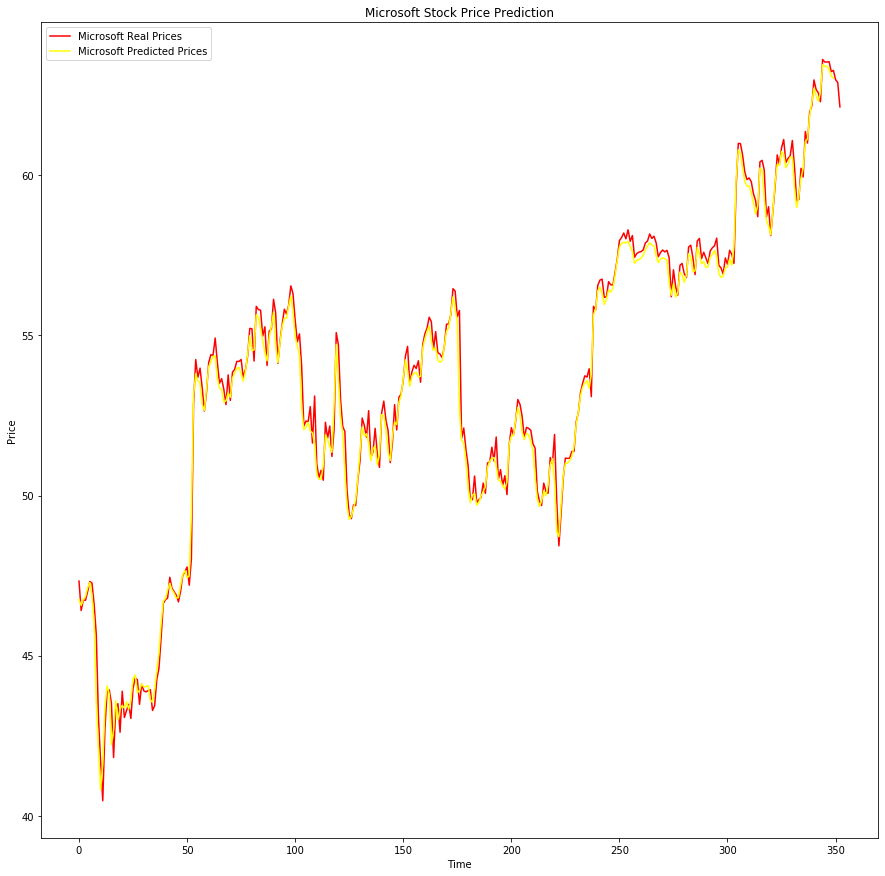

In [89]:
plt.figure(figsize=(15,15))
plt.plot(real_prices, color = 'red',label = 'Microsoft Real Prices')
plt.plot(predicted_stock_price, color = 'yellow', label = 'Microsoft Predicted Prices')
plt.title('Microsoft Stock Price Prediction')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.show()

In [33]:
train_acc = recc_model.evaluate(trainX, trainY, verbose=0)
test_acc = recc_model.evaluate(testX, testY, verbose=0)
print(train_acc)
print(test_acc)

[0.00017805842202982123, 0.009439206345650668]
[0.005195355968815939, 0.05926216261727469]


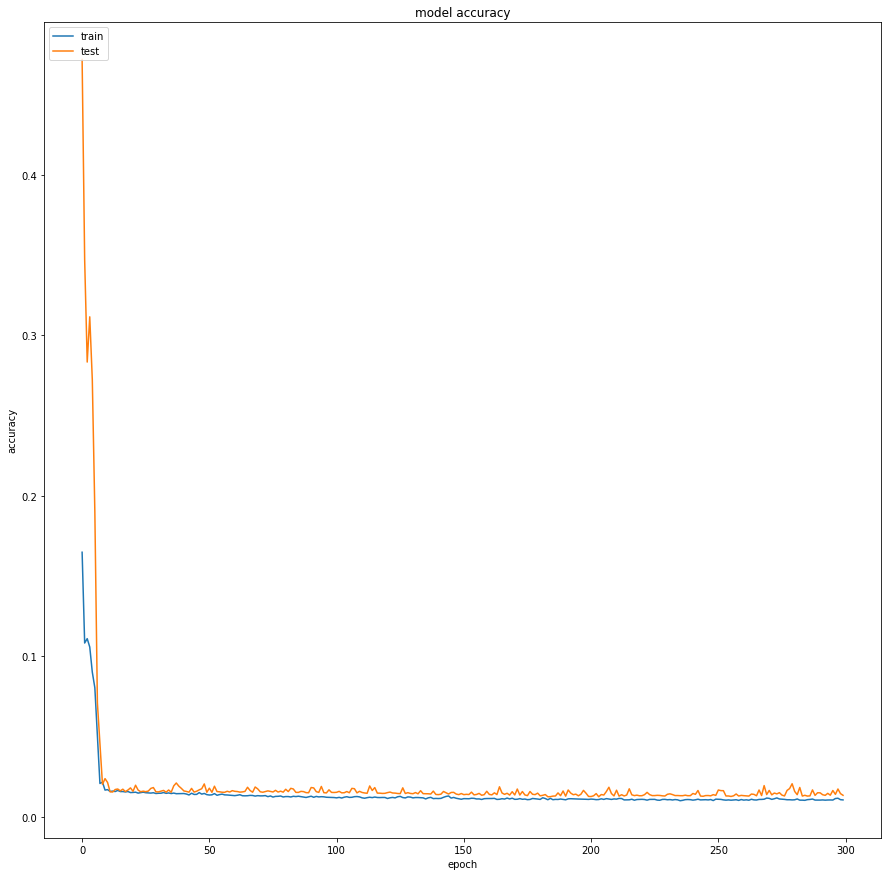

In [90]:
plt.figure(figsize=(15,15))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

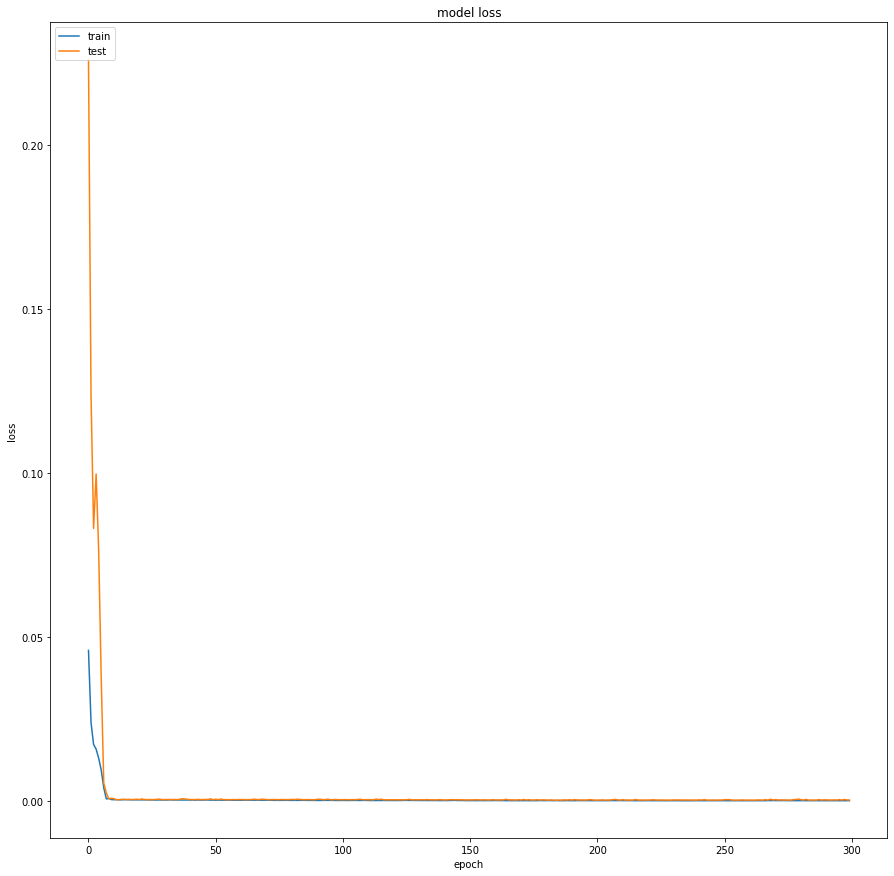

In [91]:
plt.figure(figsize=(15,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()